In [4]:
import pandas as pd
import seaborn as sns
# import openpyxl

,Unnamed: 0,Voter ID,VOTE_TYPE,ZIP,SEX,BIRTHYEAR,Voting Site,Voting Precinct,AGE
0,1239,1112782406,E,77003,M,1968,92023,9,55
1,1240,1102624198,E,77003,M,1961,92006,9,62
2,1241,1102333626,P,77003,F,1944,SRD143R,9,79
3,1242,1102333635,P,77003,M,1943,SRD143R,9,80
4,1244,1102325796,P,77003,F,1925,SRD134M,9,98


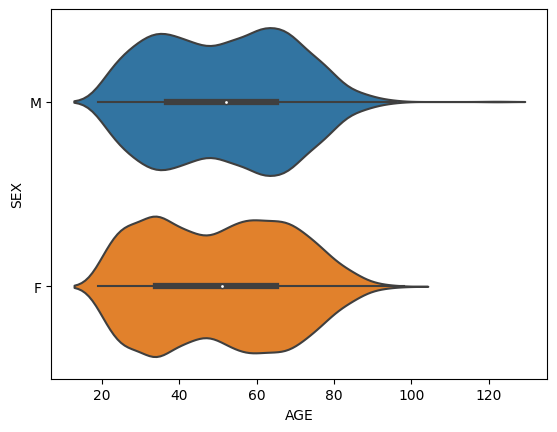

In [5]:
# OVERALL TURNOUT

# import cleaned november voters data
df = pd.read_csv('cleaned_nov_votes.csv')

# reassign age variable value
df['AGE'] = 2023 - df['BIRTHYEAR']

dff = df[(df['SEX'] == 'F')]
dfm = df[(df['SEX'] == 'M')]

frames = [dff, dfm]
df = pd.concat(frames)
# sns.violinplot(data = df, x = 'AGE', y = 'SEX')
df.head()


# import Baker-Ripley targeted voters data
targeted = pd.read_csv('targeted_nov_votes.csv')

# reassign age variable value
targeted['AGE'] = 2023 - targeted['BIRTHYEAR']

# age & sex vs. turnout of targeted voters
sns.violinplot(data = targeted, x = 'AGE', y = 'SEX')
targeted.head()

In [7]:
# voter turnout in targeted precincts

targeted = [9, 10, 11, 44, 46, 285, 347, 379, 411, 430, 431, 664, 752, 792, 793]
totalturnout = []

# find total registered voters per precinct
all_registered = pd.read_csv('clean_all_registered.csv')
prec9 = all_registered[(all_registered["Precinct"] == 9)]

# find total voter turnout per precinct

turnout = pd.read_csv('cleaned_nov_votes.csv')

# turnout9 = turnout[(turnout["Voting Precinct"] == 9)]
# percent9 = turnout9.shape[0] / prec9.shape[0]


for precinct in targeted:
    prec = all_registered[(all_registered["Precinct"] == precinct)]
    precturnout = turnout[(turnout["Voting Precinct"] == precinct)]
    percent = precturnout.shape[0] / prec.shape[0]
    totalturnout.append(percent)
    
print(totalturnout)

# calculate the average turnout across precincts 
total_sum = 0
for i in totalturnout: 
    total_sum += i

print('average turnout rate:', total_sum / len(totalturnout))



[0.4258275439313445, 0.33530042918454933, 0.34658454647256437, 0.3903120633442012, 0.3118031526336025, 0.2785817655571635, 0.3554200901139677, 0.3331712062256809, 0.24940898345153664, 0.2242152466367713, 0.22244950140628994, 0.24300932090545938, 0.4095052083333333, 0.2870693959061408, 0.3096390026051358]
average turnout rate: 0.31481983044718276


In [15]:
import plotly.express as px

fig = px.bar(x = targeted, y = totalturnout)
fig.show

<bound method BaseFigure.show of Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([  9,  10,  11,  44,  46, 285, 347, 379, 411, 430, 431, 664, 752, 792,
                          793], dtype=int64),
              'xaxis': 'x',
              'y': array([0.42582754, 0.33530043, 0.34658455, 0.39031206, 0.31180315, 0.27858177,
                          0.35542009, 0.33317121, 0.24940898, 0.22421525, 0.2224495 , 0.24300932,
                          0.40950521, 0.2870694 , 0.309639  ]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
       

In [38]:
# DONT RUN THIS CELL MORE THAN NECESSARY; IT TAKES A LONG TIME TO RUN
# a DataFrame of voter registration vs turnout data by precinct
unique_precincts = all_registered['Precinct'].sort_values().unique()

turnout = pd.DataFrame(columns=["Total Registered", "Total Turnout"], index=unique_precincts)
turnout = turnout.fillna(0).astype(int) # set default value to 0

# count total registered per precinct
total_registered_voters = 0 # sanity check
total_turnout_voters = 0 # another sanity check
for row_idx in range(0, all_registered.shape[0]):
    turnout.loc[all_registered.iloc[row_idx, 3], 'Total Registered'] += 1
    total_registered_voters += 1
for row_idx in range(0, df.shape[0]):
    turnout.loc[df.iloc[row_idx, 7], 'Total Turnout'] += 1
    total_turnout_voters += 1
print("Total registered voters: ", total_registered_voters)
print("Total voter turnout: ", total_turnout_voters)
print("Overall voter turnout percent: ", total_turnout_voters / total_registered_voters)
turnout

Total registered voters:  2411374
Total voter turnout:  997320
Overall voter turnout percent:  0.4135899283976687


,Total Registered,Total Turnout
1,1566,924
2,3839,1921
3,3162,2097
4,1849,1190
5,1623,1091
...,...,...
1147,55,8
1148,1169,365
1149,3790,1944
1151,3416,1864


In [39]:
# Dictionary mapping each targeted precinct to similar precincts
target_to_controlset_dict = {9 : {472},
                          10 : {789},
                          11 : {99},
                          44 : {112},
                          46 : {524},
                          285 : {725},
                          347 : {141},
                          379 : {725},
                          411 : {595},
                          430 : {487},
                          431 : {261},
                          664 : {320},
                          752 : {49},
                          792 : {320},
                          793 : {141}}

In [40]:
# Targeted precincts turnout
targeted_turnout = pd.DataFrame(columns=['Percentage Turnout'], index=targeted)
for precinct in targeted_turnout.index:
    targeted_turnout.loc[precinct, 'Percentage Turnout'] = turnout.loc[precinct, 'Total Turnout'] / turnout.loc[precinct, 'Total Registered']
targeted_turnout

,Percentage Turnout
9,0.425828
10,0.3353
11,0.346585
44,0.390312
46,0.311803
285,0.278582
347,0.35542
379,0.333171
411,0.249409
430,0.224215


In [42]:
# Untargeted, similar precincts turnout. These precincts are used as "control" groups for targeted precincts
# get set of unique precincts used as control precincts
control_set = set()
for targeted_precinct in target_to_controlset_dict:
    for control_precint in target_to_controlset_dict[targeted_precinct]:
        control_set.add(control_precint)

control_turnout = pd.DataFrame(columns=['Percentage Turnout'], index=control_set)
for precinct in control_turnout.index:
    control_turnout.loc[precinct, 'Percentage Turnout'] = turnout.loc[precinct, 'Total Turnout'] / turnout.loc[precinct, 'Total Registered']
control_turnout

,Percentage Turnout
320,0.278528
99,0.243759
261,0.242633
487,0.265835
524,0.352042
141,0.246964
112,0.464119
49,0.404622
595,0.27994
789,0.439513


In [44]:
# difference in percentage turnout for targeted precinct - avg(similar precincts)
turnout_diff = pd.DataFrame(columns=['Percentage Turnout Difference (targeted - control)'], index=targeted)
for precinct in turnout_diff.index:
    # get targeted precinct's set of similar precincts
    similar_precincts = target_to_controlset_dict[precinct]
    # compute average % turnout in these similar precincts
    perc_sum = 0
    for similar_precinct in similar_precincts:
        perc_sum += control_turnout.loc[similar_precinct, 'Percentage Turnout']
    perc_avg = perc_sum / len(similar_precincts)
    # compute targeted precinct turnout % - similar control precinct turnout %
    turnout_diff.loc[precinct, 'Percentage Turnout Difference (targeted - control)'] = targeted_turnout.loc[precinct, 'Percentage Turnout'] - perc_avg
turnout_diff

,Percentage Turnout Difference (targeted - control)
9,-0.142659
10,-0.104213
11,0.102826
44,-0.073807
46,-0.040239
285,-0.067402
347,0.108457
379,-0.012813
411,-0.030531
430,-0.04162


In [ ]:
# Calculate statistical significance of outreach on voter turnout